In [1]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d
import itertools
import os
from scipy.signal import find_peaks
import cv2

/tmp/ipykernel_153676/2164428936.py:6: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [2]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
#print(mpl.rcParams.keys())
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams["mathtext.default"] = 'bf'
mpl.rcParams['xtick.major.width'] = 15

In [6]:
def plot_FID(names,colors,root):
    
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
    
    step_bins = 58
    
    font = {#'family': 'normal',
        'color':  'black',
        'weight': 'bold',
        'size': 15
        }
    for name,color in zip(names,colors):
        
        folder = os.path.join(root,name)
       
        y = np.load(folder+'.npy',allow_pickle='TRUE').item()
        
        y = y["FID"]
            
        label = name.upper()
        
        num_examples = (len(y) // step_bins) * step_bins
        
        x = np.array(range(num_examples // step_bins))
        
        y = torch.Tensor(y[:num_examples]).view(-1, step_bins).mean(1)
        
        peaks, _ = find_peaks(y, height=0)
        
        m = np.zeros(x.shape, dtype=bool)
        
        m[peaks] = True
    
        plt.plot(x[~m],gaussian_filter1d(y[~m],sigma=0.1),label=label,color=color,linewidth=2)
        
        
    plt.xlabel("Epoch",fontdict=font)
    #plt.legend(loc="best")
    plt.ylabel("FID",fontdict=font)
    plt.yscale('log')
    plt.show()
    #fig.savefig("GAN/Figures/GAN_MNIST_1024.jpg", format='JPEG',dpi=600,transparent = True, bbox_inches = 'tight')
    plt.close()
    

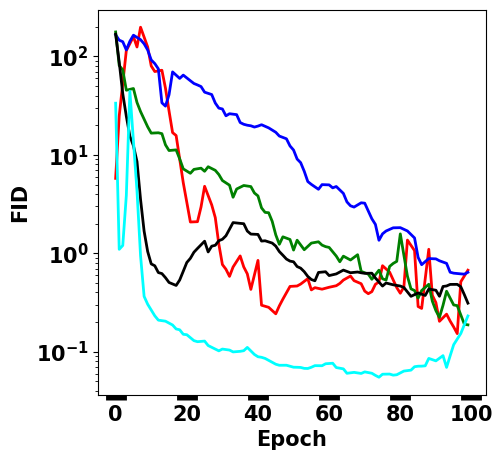

In [7]:
root = "./results_ref/MNIST/fids/1024"
names = ["sgda","adam","kfac1","kfac2","kfac3"]
colors = ["red","blue","green",'black',"cyan"]
plot_FID(names,colors,root)